In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))


from src.simulation_options import simulateSinglePorosity
from src.Rose_data import time_points as rose_time
from src.Rose_data import nds_true_conc

In [2]:
df = pd.read_csv("../lhs_results/SinglePorosityTwoFractureSimulationRuns.csv")
df = df.sort_values('MSE').reset_index(drop=True)
df.head(8)


,iteration,mean_residence_time_1,peclet_number_1,mean_residence_time_2,peclet_number_2,fractional_recovery,MSE,R2
0,7030,37.475580,1.885552,14.553631,12.690903,0.731288,0.000939,0.926946
1,6235,13.674116,25.118189,35.542481,1.554751,0.080959,0.001174,0.908691
2,8109,10.389143,49.651821,27.783494,2.633935,0.091410,0.001242,0.903417
3,6242,9.176907,95.134912,27.475221,3.377050,0.052906,0.001281,0.900407
4,6265,47.993414,1.203884,12.920855,17.093455,0.959871,0.001296,0.899194
5,2443,12.798248,7.212351,33.931319,3.273512,0.369307,0.001374,0.893181
6,5096,26.805205,2.924895,48.199927,44.478610,0.920523,0.001409,0.890439
7,2955,27.042283,2.917003,41.706166,98.070957,0.938905,0.001511,0.882465


In [3]:
idx = 5
mrt_1 = df.loc[idx, 'mean_residence_time_1']
pec_1 = df.loc[idx, 'peclet_number_1']

mrt_2 = df.loc[idx, 'mean_residence_time_2']
pec_2 = df.loc[idx, 'peclet_number_2']

fr  = df.loc[idx, 'fractional_recovery']

print(f"MRT 1 = {mrt_1:0.3f} hr")
print(f"Peclet number 1 {pec_1:0.3f}")

print(f"MRT 2 = {mrt_2:0.3f} hr")
print(f"Peclet number 2 {pec_2:0.3f}")

print(f"FR 1 = {fr:0.4f}")
print(f"FR 2 = {1-fr:0.4f}")

time_points = np.linspace(0.00001, 130, 500)

frac_retard = 1.0
bckgrnd_conc = 0.0
inj_concs = np.array([7.0, 0], dtype=float)
inj_durs = np.cumsum(np.array([1.5]))


first_component = simulateSinglePorosity(
        mrt_1,
        pec_1,
        frac_retard,
        time_points,
        bckgrnd_conc,
        inj_concs,
        inj_durs
)

second_component = simulateSinglePorosity(
        mrt_2,
        pec_2,
        frac_retard,
        time_points,
        bckgrnd_conc,
        inj_concs,
        inj_durs
)


combined = first_component * fr + second_component * (1-fr)


MRT 1 = 12.798 hr
Peclet number 1 7.212
MRT 2 = 33.931 hr
Peclet number 2 3.274
FR 1 = 0.3693
FR 2 = 0.6307


In [6]:
df = {'RELAP Time (hr)': time_points,
      'RELAP First Component (mg/L)': first_component*fr,
      'RELAP Second Component (mg/L)': second_component*(1-fr),
      'RELAP Combined (mg/L)': combined}

df = pd.DataFrame(df)

df.to_csv('../outputs/Figure_3.csv')

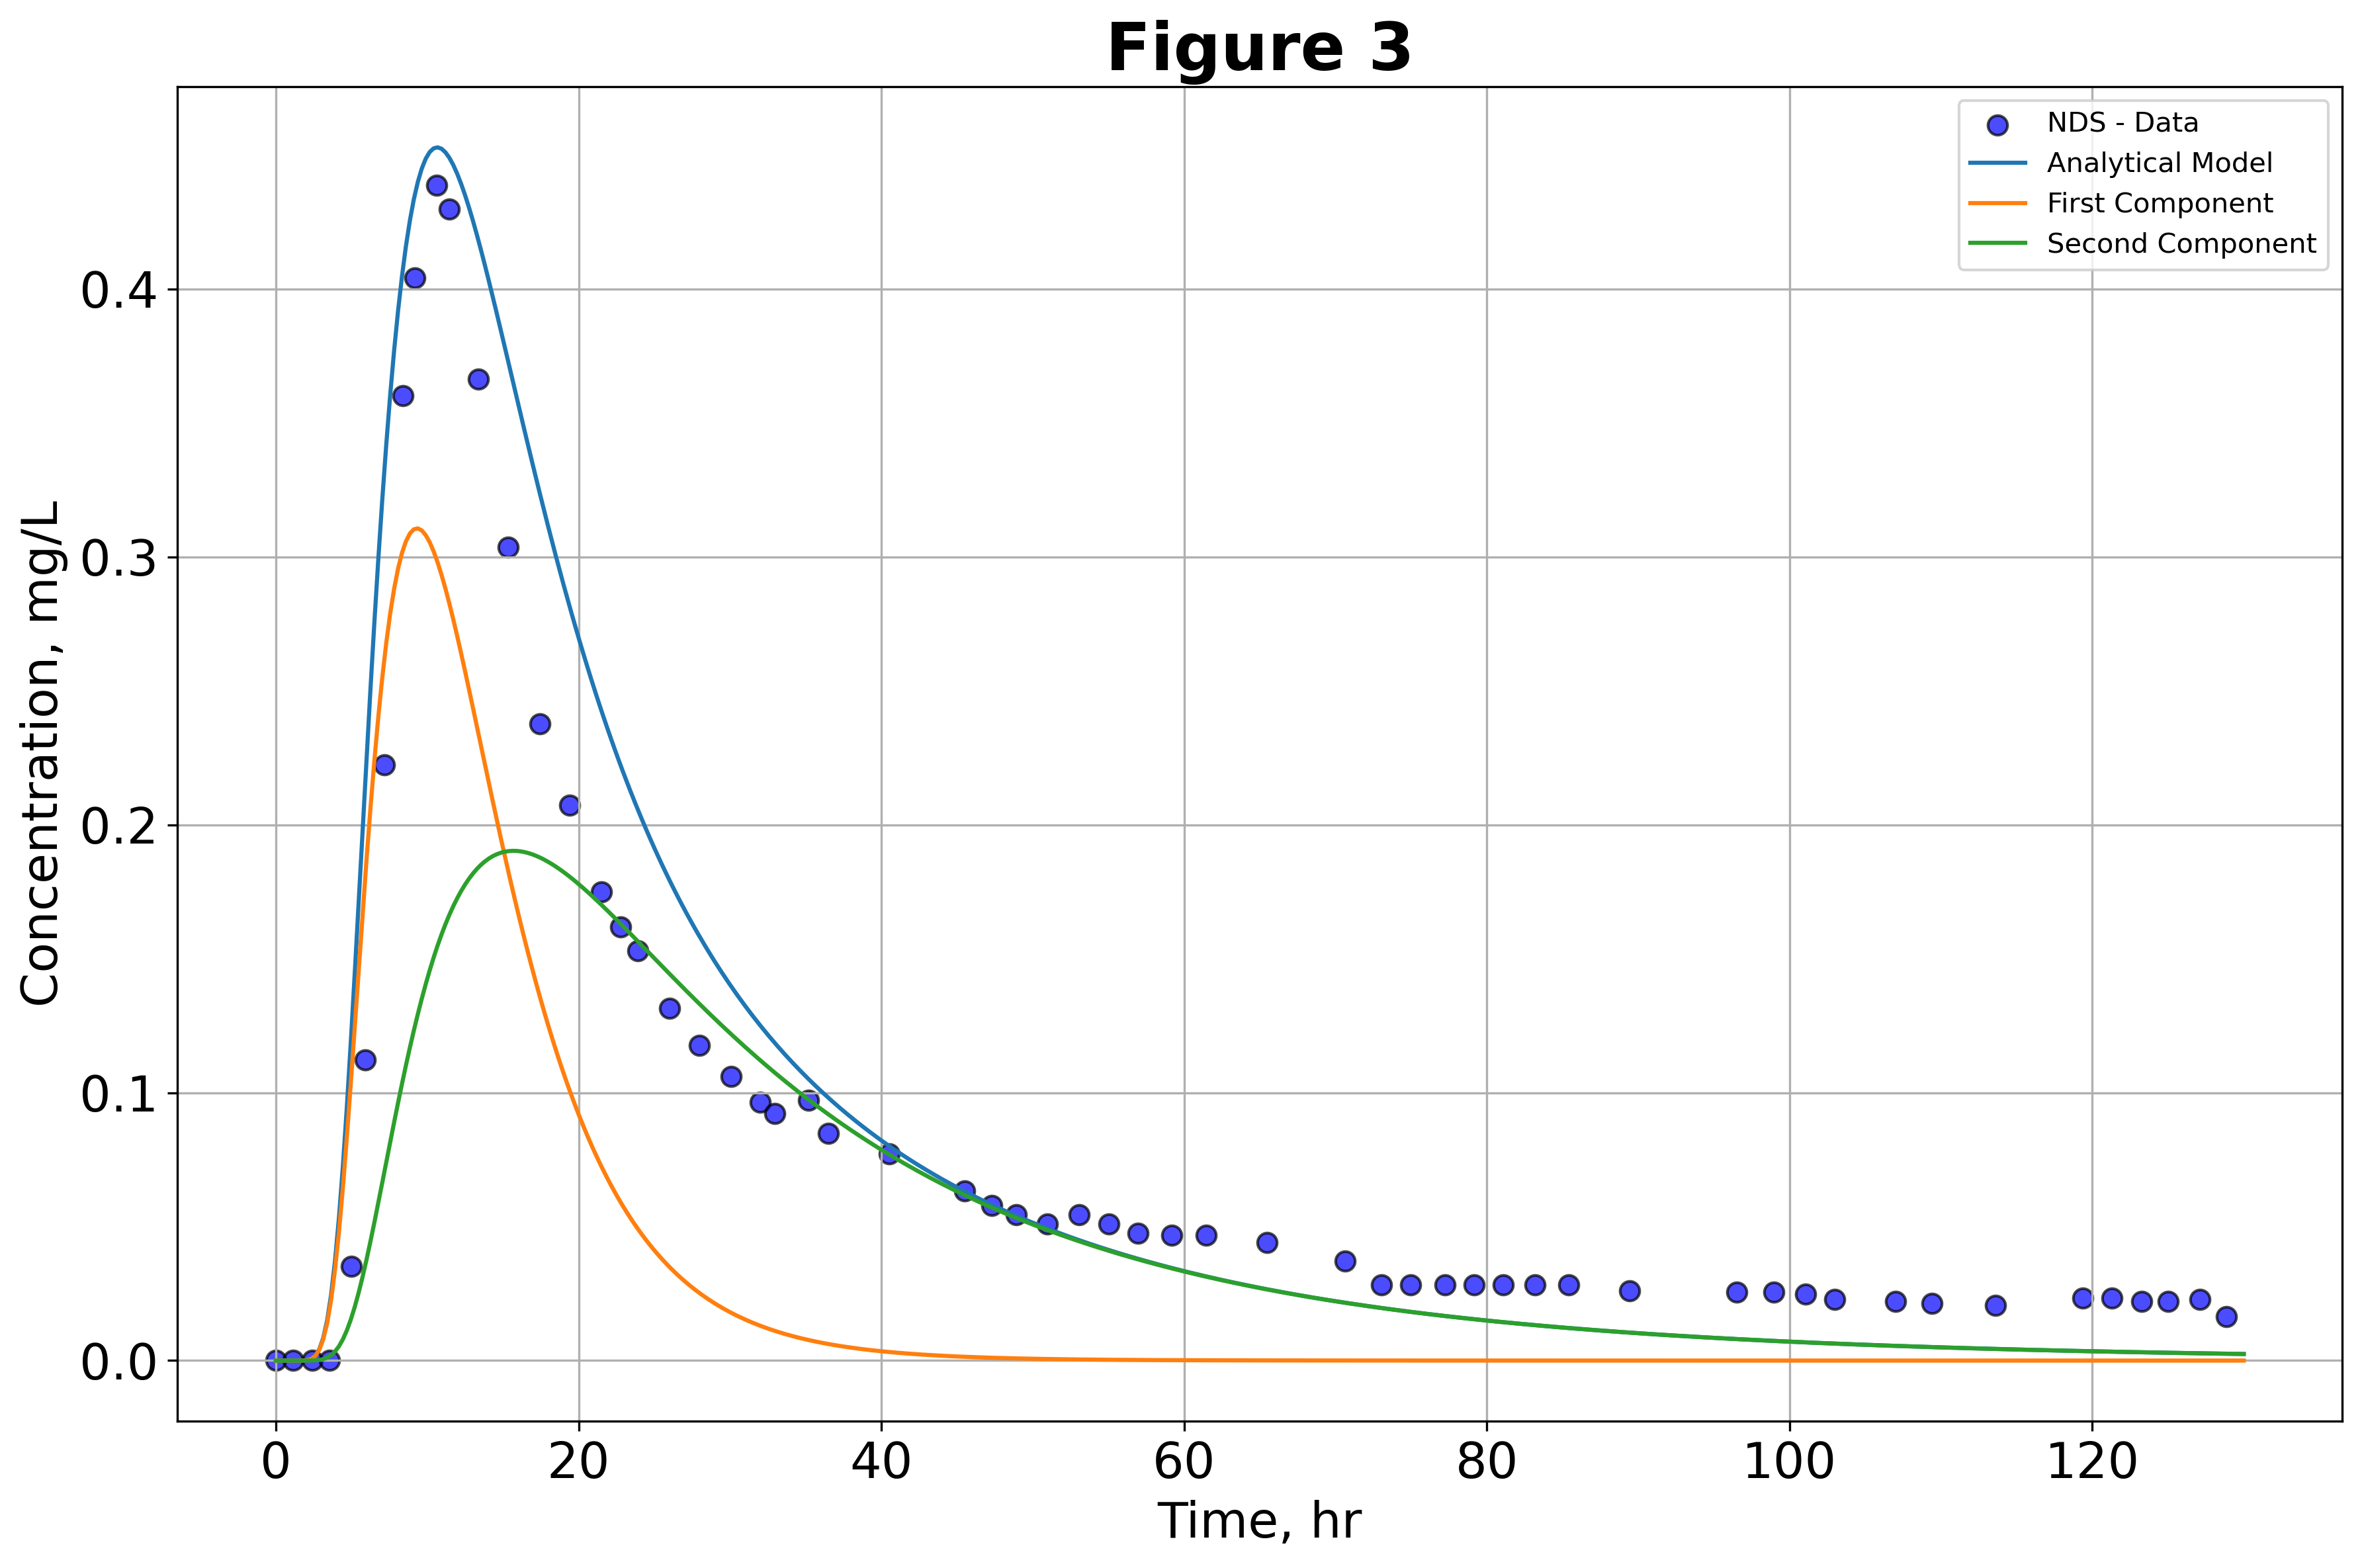

In [4]:
plt.figure(figsize=(12, 8), dpi=300)
plt.scatter(rose_time, nds_true_conc, color='blue', edgecolor='black', alpha=0.7, s=50, label="NDS - Data")
plt.plot(time_points, combined, label="Analytical Model")
plt.plot(time_points, first_component * fr, label="First Component")
plt.plot(time_points, second_component * (1 - fr), label="Second Component")

plt.title("Figure 3", fontsize=24, fontweight="bold")
plt.xlabel("Time, hr", fontsize=18)
plt.ylabel("Concentration, mg/L", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.tight_layout()

plt.legend()

# os.makedirs('Figure/Figure_3.jpg')
# plt.savefig('Figure/Figure_3.jpg', dpi=300)

plt.show()